<a href="https://colab.research.google.com/github/edwinibrahimsalim/prediksi-penyakit-osteoporosis/blob/main/Pemodelan_dan_Optimasi_Klasifikasi_Risiko_Osteoporosis_dengan_Pendekatan_Machine_Learning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Library Utama**

In [ ]:
!pip install pandas
!pip install numpy
!pip install matplotlib
!pip install seaborn

!pip install scikit-learn
!pip install xgboost
!pip install lightgbm

!pip install imbalanced-learn
!pip install pyspark

# **Pre-Processing data**

In [ ]:
# Import library yang diperlukan
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
# Load dataset
# Ganti 'osteoporosis.csv' dengan path file yang sesuai di Google Colab
from google.colab import files
data = pd.read_csv('/content/osteoporosis.csv')

In [ ]:
# 1. Periksa tipe data
print("Tipe data tiap kolom:")
print(data.dtypes)

Tipe data tiap kolom:
Id                      int64
Age                     int64
Gender                 object
Hormonal Changes       object
Family History         object
Race/Ethnicity         object
Body Weight            object
Calcium Intake         object
Vitamin D Intake       object
Physical Activity      object
Smoking                object
Alcohol Consumption    object
Medical Conditions     object
Medications            object
Prior Fractures        object
Osteoporosis            int64
dtype: object


In [ ]:
# 2. Ganti nama kolom (jika diperlukan)
#df.rename(columns={
#    'old_column_name': 'new_column_name',  # Contoh penggantian nama kolom
#}, inplace=True)
#print("\nKolom Setelah Penggantian Nama:")
#print(df.columns)

In [ ]:
# 3. Tangani nilai null atau data hilang
# Menampilkan jumlah nilai null pada setiap kolom
print("\nJumlah nilai null di setiap kolom:")
print(data.isnull().sum())


Jumlah nilai null di setiap kolom:
Id                       0
Age                      0
Gender                   0
Hormonal Changes         0
Family History           0
Race/Ethnicity           0
Body Weight              0
Calcium Intake           0
Vitamin D Intake         0
Physical Activity        0
Smoking                  0
Alcohol Consumption    988
Medical Conditions     647
Medications            985
Prior Fractures          0
Osteoporosis             0
dtype: int64


In [ ]:
# Imputasi missing value
# Jika data numerik
numerical_cols = data.select_dtypes(include=['float64', 'int64']).columns
for col in numerical_cols:
    data[col].fillna(data[col].median(), inplace=True)  # Gunakan median untuk numerik


<ipython-input-11-e670ae41072f>:5: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data[col].fillna(data[col].median(), inplace=True)  # Gunakan median untuk numerik


In [ ]:
# Mengubah kolom kategorikal menjadi tipe numerik menggunakan encoding
categorical_cols = data.select_dtypes(include=['object']).columns

# Menggunakan Label Encoding untuk kolom kategorikal
for col in categorical_cols:
    data[col] = data[col].astype('category').cat.codes


In [ ]:
# Periksa kembali nilai null setelah imputasi
print("\nJumlah nilai null setelah imputasi:")
print(data.isnull().sum())


Jumlah nilai null setelah imputasi:
Id                     0
Age                    0
Gender                 0
Hormonal Changes       0
Family History         0
Race/Ethnicity         0
Body Weight            0
Calcium Intake         0
Vitamin D Intake       0
Physical Activity      0
Smoking                0
Alcohol Consumption    0
Medical Conditions     0
Medications            0
Prior Fractures        0
Osteoporosis           0
dtype: int64


In [ ]:
# Tampilkan summary data
print("\nRingkasan statistik:")
print(data.describe(include='all'))


Ringkasan statistik:
                  Id          Age       Gender  Hormonal Changes  \
count    1958.000000  1958.000000  1958.000000       1958.000000   
mean   105515.320735    39.101124     0.506639          0.498979   
std      2589.407806    21.355424     0.500084          0.500127   
min    101008.000000    18.000000     0.000000          0.000000   
25%    103348.500000    21.000000     0.000000          0.000000   
50%    105469.000000    32.000000     1.000000          0.000000   
75%    107755.000000    53.000000     1.000000          1.000000   
max    109996.000000    90.000000     1.000000          1.000000   

       Family History  Race/Ethnicity  Body Weight  Calcium Intake  \
count     1958.000000     1958.000000  1958.000000     1958.000000   
mean         0.490296        0.982125     0.475485        0.512768   
std          0.500034        0.823261     0.499526        0.499965   
min          0.000000        0.000000     0.000000        0.000000   
25%          0.

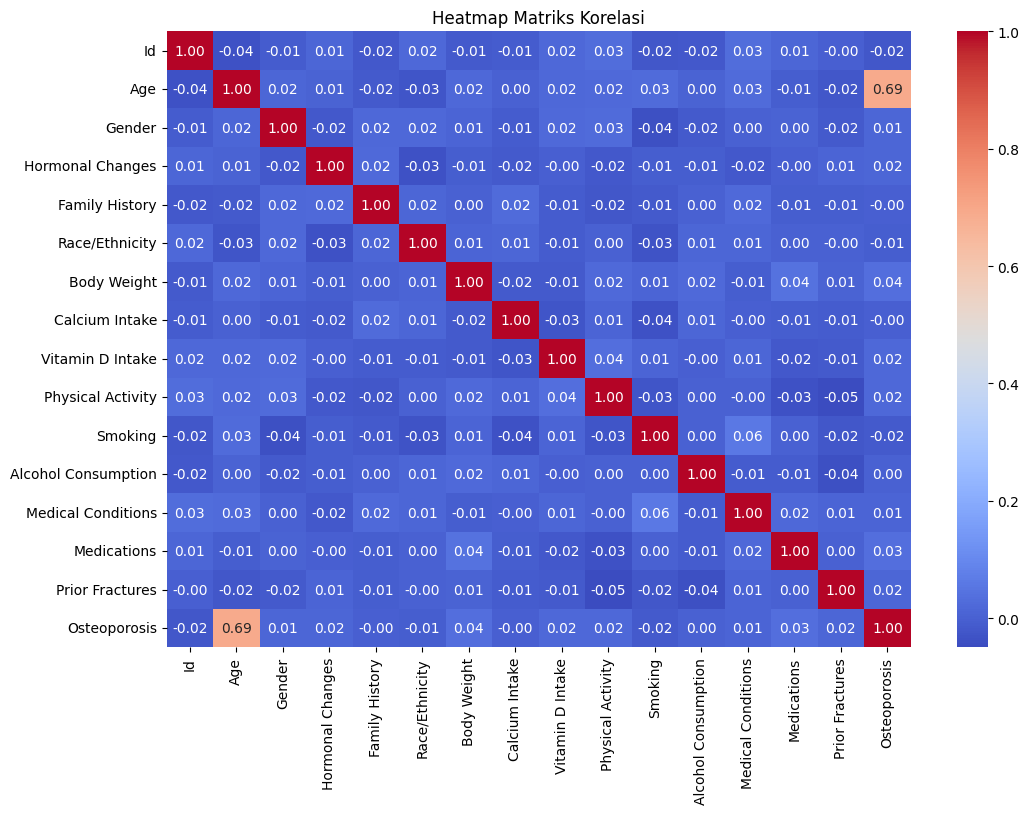

In [ ]:
# Hitung matriks korelasi hanya untuk kolom numerik
correlation_matrix = data.select_dtypes(include=np.number).corr()

# Tampilkan heatmap korelasi
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, fmt='.2f', cmap='coolwarm')
plt.title('Heatmap Matriks Korelasi')
plt.show()

# **Exploratory Data Analysis (EDA)**

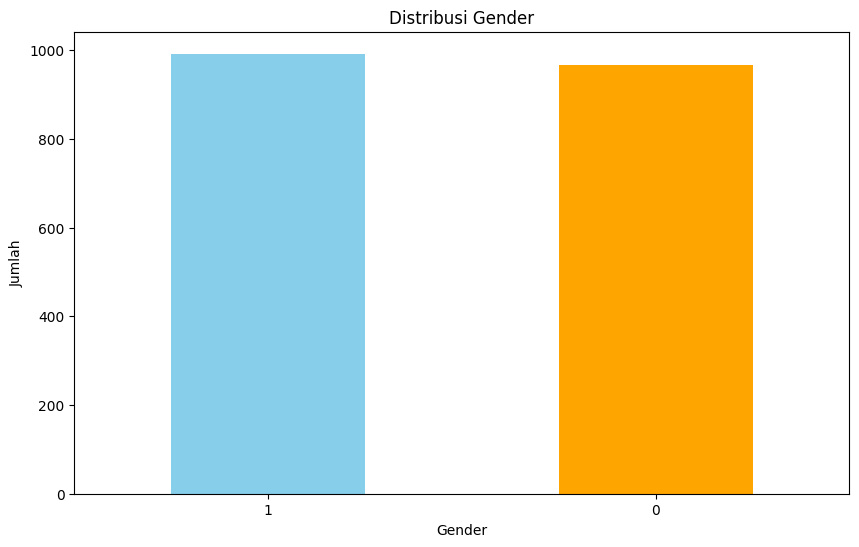

In [ ]:
# 1. Bar chart: Distribusi kategorikal
plt.figure(figsize=(10, 6))
data['Gender'].value_counts().plot(kind='bar', color=['skyblue', 'orange'])
plt.title('Distribusi Gender')
plt.xlabel('Gender')
plt.ylabel('Jumlah')
plt.xticks(rotation=0)
plt.show()


Kedua kategori gender (1 dan 0) memiliki jumlah yang hampir sama.
Kategori gender 1 sedikit lebih banyak daripada gender 0.

---



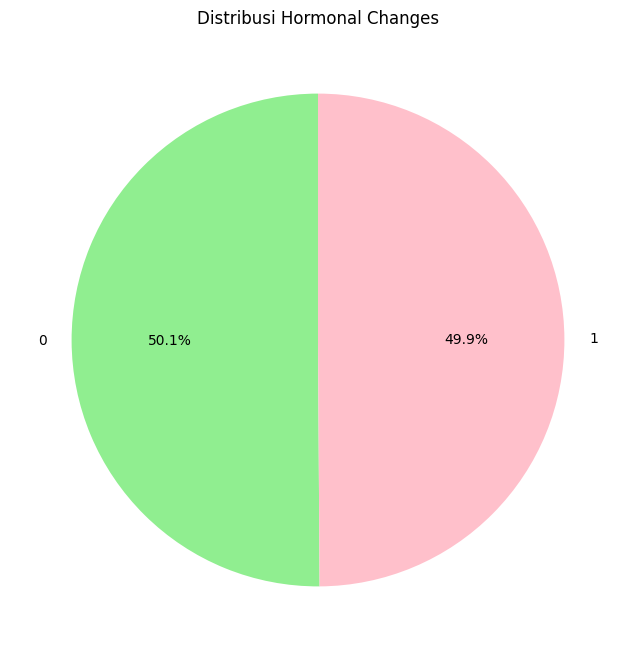

In [ ]:
# 2. Pie chart: Representasi distribusi dalam persentase (contoh: Hormonal Changes)
plt.figure(figsize=(8, 8))
data['Hormonal Changes'].value_counts().plot(kind='pie', autopct='%1.1f%%', startangle=90, colors=['lightgreen', 'pink', 'yellow'])
plt.title('Distribusi Hormonal Changes')
plt.ylabel('')
plt.show()

persentase distribusi kategori dalam data Hormonal Changes

---



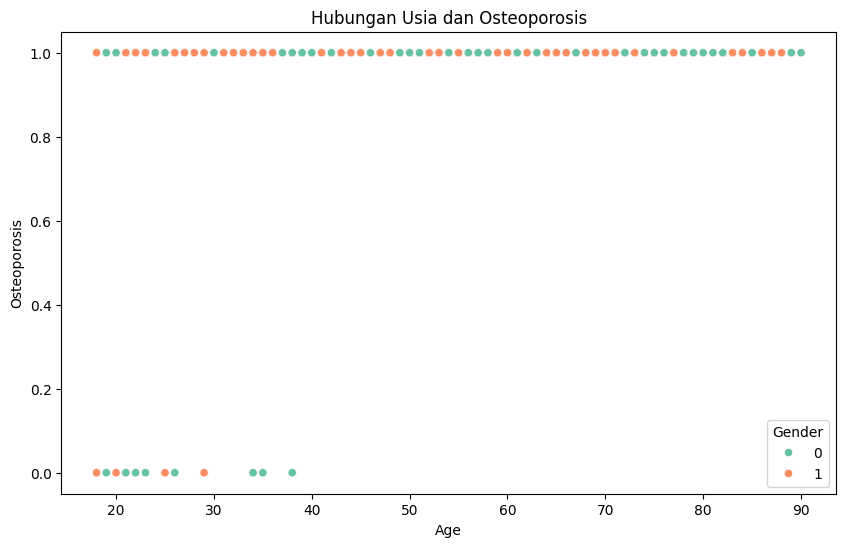

In [ ]:
# 3. Scatter plot: Hubungan antara Age dan Osteoporosis
plt.figure(figsize=(10, 6))
sns.scatterplot(data=data, x='Age', y='Osteoporosis', hue='Gender', palette='Set2')
plt.title('Hubungan Usia dan Osteoporosis')
plt.xlabel('Age')
plt.ylabel('Osteoporosis')
plt.show()

Grafik ini menunjukkan hubungan antara usia (Age) dan status osteoporosis (0 = Tidak, 1 = Ya), dengan warna yang membedakan gender (hijau untuk 0, oranye untuk 1). Osteoporosis lebih sering terjadi pada usia yang lebih tua, seperti terlihat pada titik-titik di y=1, sementara usia muda cenderung berada di y=0. Grafik ini mempermudah untuk melihat pola berdasarkan usia dan gender secara visual.








---



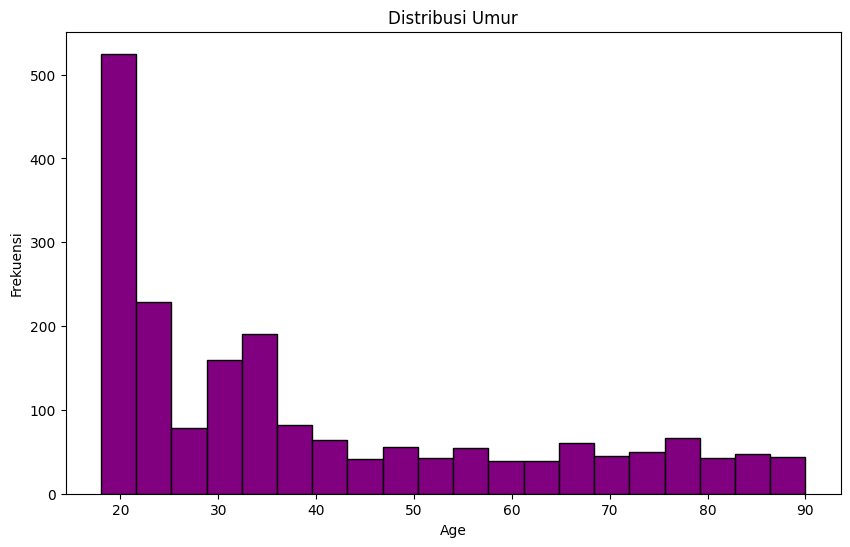

In [ ]:
# 4. Histogram: Distribusi umur (Age)
plt.figure(figsize=(10, 6))
data['Age'].plot(kind='hist', bins=20, color='purple', edgecolor='black')
plt.title('Distribusi Umur')
plt.xlabel('Age')
plt.ylabel('Frekuensi')
plt.show()

Histogram ini menunjukkan distribusi umur (Age) dalam dataset, dengan jumlah individu (frekuensi) pada setiap rentang umur. Sebagian besar data berada di rentang usia sekitar 20 tahun, dan jumlahnya berkurang seiring bertambahnya usia. Grafik ini membantu memahami pola sebaran umur dalam data secara visual.

---



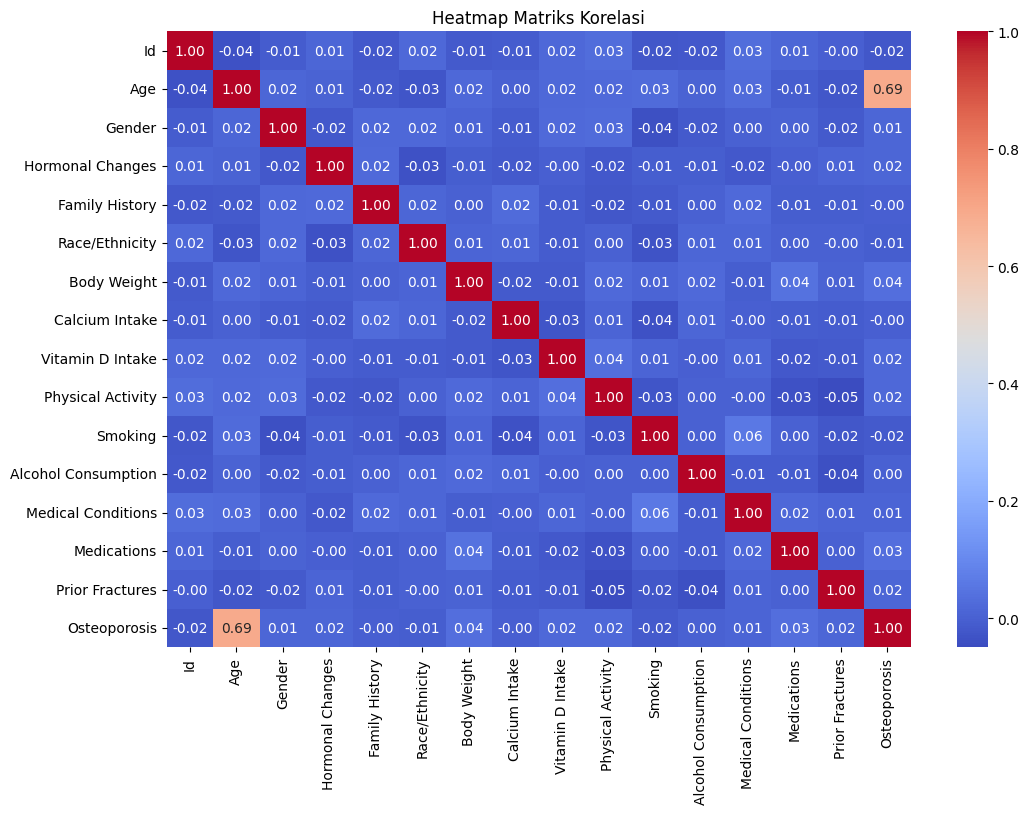

In [ ]:
# 5. Heatmap: Korelasi antar fitur
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, fmt='.2f', cmap='coolwarm')
plt.title('Heatmap Matriks Korelasi')
plt.show()

Heatmap ini menunjukkan matriks korelasi antar fitur dalam dataset. Nilai korelasi berkisar antara -1 (hubungan negatif kuat) hingga 1 (hubungan positif kuat), dengan warna yang mencerminkan intensitas hubungan (merah = positif, biru = negatif). Dari grafik ini, terlihat bahwa Usia (Age) memiliki korelasi positif kuat dengan Osteoporosis (0.69), menunjukkan bahwa risiko osteoporosis meningkat seiring bertambahnya usia. Heatmap ini membantu mengidentifikasi hubungan antar fitur dengan cepat.








---



# **Pengembangan Model Machine Learning**

In [ ]:
# Import pustaka yang diperlukan
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score, roc_auc_score
from sklearn.preprocessing import LabelEncoder

/usr/local/lib/python3.10/dist-packages/dask/dataframe/__init__.py:42: FutureWarning: 
Dask dataframe query planning is disabled because dask-expr is not installed.

You can install it with `pip install dask[dataframe]` or `conda install dask`.
This will raise in a future version.

  warnings.warn(msg, FutureWarning)


In [ ]:
# Pisahkan fitur dan target
# 'X' berisi semua kolom kecuali kolom target ('Osteoporosis'), sedangkan 'y' berisi kolom target yang ingin diprediksi.
X = data.drop('Osteoporosis', axis=1) # Menghapus kolom 'Osteoporosis' dari fitur
y = data['Osteoporosis'] # Mengambil kolom 'Osteoporosis' sebagai target

# Encoding target jika perlu
label_encoder = LabelEncoder()
y = label_encoder.fit_transform(y)

# Split data menjadi train dan test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)


Data dibagi menjadi 70% pelatihan dan 30% pengujian.
Target (Osteoporosis) di-encode ke bentuk numerik jika belum dalam format angka.


---



**Random Forest**

In [ ]:
rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(X_train, y_train)
y_pred_rf = rf_model.predict(X_test)
y_prob_rf = rf_model.predict_proba(X_test)[:, 1]

**Gradient Boost Tree**

In [ ]:
gbt_model = GradientBoostingClassifier(random_state=42)
gbt_model.fit(X_train, y_train)
y_pred_gbt = gbt_model.predict(X_test)
y_prob_gbt = gbt_model.predict_proba(X_test)[:, 1]

**XGBoost** (Model boosting dengan optimasi kecepatan dan akurasi)

In [ ]:
xgb_model = XGBClassifier(random_state=42, use_label_encoder=False, eval_metric='logloss')
xgb_model.fit(X_train, y_train)
y_pred_xgb = xgb_model.predict(X_test)
y_prob_xgb = xgb_model.predict_proba(X_test)[:, 1]

/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [03:34:02] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


**LightGBM** (Model boosting yang efisien untuk dataset besar)

In [ ]:
lgbm_model = LGBMClassifier(random_state=42)
lgbm_model.fit(X_train, y_train)
y_pred_lgbm = lgbm_model.predict(X_test)
y_prob_lgbm = lgbm_model.predict_proba(X_test)[:, 1]

[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Number of positive: 676, number of negative: 694
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000885 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 356
[LightGBM] [Info] Number of data points in the train set: 1370, number of used features: 15
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.493431 -> initscore=-0.026279
[LightGBM] [Info] Start training from score -0.026279


In [ ]:
# Evaluasi performa
def evaluate_model(y_test, y_pred, y_prob, model_name):
    accuracy = accuracy_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    auc = roc_auc_score(y_test, y_prob)

    print(f"=== {model_name} ===")
    print(f"Akurasi: {accuracy:.2f}")
    print(f"F1 Score: {f1:.2f}")
    print(f"Presisi: {precision:.2f}")
    print(f"Recall: {recall:.2f}")
    print(f"AUC: {auc:.2f}")
    print("\n")

In [ ]:
evaluate_model(y_test, y_pred_rf, y_prob_rf, "Random Forest")
evaluate_model(y_test, y_pred_gbt, y_prob_gbt, "Gradient Boost Tree")
evaluate_model(y_test, y_pred_xgb, y_prob_xgb, "XGBoost")
evaluate_model(y_test, y_pred_lgbm, y_prob_lgbm, "LightGBM")

=== Random Forest ===
Akurasi: 0.86
F1 Score: 0.84
Presisi: 0.95
Recall: 0.76
AUC: 0.90


=== Gradient Boost Tree ===
Akurasi: 0.91
F1 Score: 0.91
Presisi: 0.97
Recall: 0.85
AUC: 0.92


=== XGBoost ===
Akurasi: 0.88
F1 Score: 0.88
Presisi: 0.91
Recall: 0.84
AUC: 0.91


=== LightGBM ===
Akurasi: 0.90
F1 Score: 0.90
Presisi: 0.96
Recall: 0.84
AUC: 0.92




# **Hyperparameter Tuning**

In [ ]:
!pip install --upgrade scikit-learn xgboost

In [ ]:
# Import pustaka yang diperlukan
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
# Make sure XGBoost and LightGBM are installed
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score, roc_auc_score
from sklearn.preprocessing import LabelEncoder
# Import GridSearchCV
from sklearn.model_selection import GridSearchCV

In [ ]:
# 1. Hyperparameter Tuning untuk Random Forest
rf_params = {
    'n_estimators': [100, 200, 300],       # Jumlah pohon dalam hutan
    'max_depth': [None, 10, 20, 30],      # Kedalaman maksimum pohon
    'min_samples_split': [2, 5, 10],      # Minimum sampel untuk split
    'min_samples_leaf': [1, 2, 4],        # Minimum sampel untuk daun
}

# Grid Search untuk Random Forest
rf_grid = GridSearchCV(RandomForestClassifier(random_state=42), rf_params, cv=3, scoring='roc_auc', verbose=2, n_jobs=-1)
rf_grid.fit(X_train, y_train)

# Menampilkan parameter terbaik dan hasil
print("=== Random Forest ===")
print("Best Parameters:", rf_grid.best_params_)
print("Best AUC Score:", rf_grid.best_score_)

# Evaluasi ulang model setelah tuning
rf_best = rf_grid.best_estimator_
y_pred_rf_best = rf_best.predict(X_test)
y_prob_rf_best = rf_best.predict_proba(X_test)[:, 1]
evaluate_model(y_test, y_pred_rf_best, y_prob_rf_best, "Random Forest (Tuned)")


Fitting 3 folds for each of 108 candidates, totalling 324 fits
=== Random Forest ===
Best Parameters: {'max_depth': 10, 'min_samples_leaf': 4, 'min_samples_split': 2, 'n_estimators': 300}
Best AUC Score: 0.9042965158802815
=== Random Forest (Tuned) ===
Akurasi: 0.85
F1 Score: 0.84
Presisi: 0.97
Recall: 0.74
AUC: 0.90




In [ ]:
from xgboost import cv, DMatrix
from xgboost import XGBClassifier

# Mengonversi data menjadi format DMatrix untuk XGBoost
dtrain = DMatrix(X_train, label=y_train)
dtest = DMatrix(X_test, label=y_test)

# Parameter awal untuk tuning
xgb_params = {
    'objective': 'binary:logistic',
    'eval_metric': 'auc',
    'max_depth': 3,
    'learning_rate': 0.1,
    'subsample': 0.8,
    'colsample_bytree': 0.8,
}

# Cross-validation untuk tuning
cv_results = cv(params=xgb_params, dtrain=dtrain, nfold=3, num_boost_round=200, early_stopping_rounds=10, metrics='auc', seed=42)

# Menampilkan hasil tuning terbaik
best_n_estimators = len(cv_results)
print("Best number of trees:", best_n_estimators)

# Melatih model dengan parameter terbaik
xgb_best = XGBClassifier(**xgb_params, n_estimators=best_n_estimators)  # Second definition here
xgb_best.fit(X_train, y_train)
y_pred_xgb_best = xgb_best.predict(X_test)
y_prob_xgb_best = xgb_best.predict_proba(X_test)[:, 1]

# Evaluasi hasil setelah tuning
evaluate_model(y_test, y_pred_xgb_best, y_prob_xgb_best, "XGBoost (Tuned with Built-in)")


Best number of trees: 19
=== XGBoost (Tuned with Built-in) ===
Akurasi: 0.90
F1 Score: 0.90
Presisi: 1.00
Recall: 0.82
AUC: 0.93




In [ ]:
from pyspark.sql import SparkSession
from pyspark.sql import functions as F
from pyspark.ml.classification import RandomForestClassifier
from pyspark.ml.evaluation import MulticlassClassificationEvaluator
from pyspark.ml.feature import VectorAssembler

# Initialize Spark session
spark = SparkSession.builder.appName("ConfusionMatrix").getOrCreate()

# Assuming 'data' is your pandas DataFrame
# Convert pandas DataFrame to PySpark DataFrame
spark_df = spark.createDataFrame(data)

# Define features and target column
feature_cols = spark_df.columns[:-1]  # Exclude 'Osteoporosis'
assembler = VectorAssembler(inputCols=feature_cols, outputCol="features")
spark_df = assembler.transform(spark_df)

# Split data into train and test
train_data, test_data = spark_df.randomSplit([0.7, 0.3], seed=42)

# Train a RandomForest model
rf = RandomForestClassifier(labelCol="Osteoporosis", featuresCol="features", numTrees=100)
model = rf.fit(train_data)

# Make predictions on test data
predictions = model.transform(test_data)

# Calculate confusion matrix
tp = predictions.filter((F.col("Osteoporosis") == 1) & (F.col("prediction") == 1)).count()
tn = predictions.filter((F.col("Osteoporosis") == 0) & (F.col("prediction") == 0)).count()
fp = predictions.filter((F.col("Osteoporosis") == 0) & (F.col("prediction") == 1)).count()
fn = predictions.filter((F.col("Osteoporosis") == 1) & (F.col("prediction") == 0)).count()

# Print confusion matrix components
print(f"True Positives: {tp}")
print(f"True Negatives: {tn}")
print(f"False Positives: {fp}")
print(f"False Negatives: {fn}")

# Create and display confusion matrix
confusion_matrix = [[tp, fn],
                    [fp, tn]]

print("\nConfusion Matrix:")
for row in confusion_matrix:
    print(row)

True Positives: 187
True Negatives: 282
False Positives: 14
False Negatives: 63

Confusion Matrix:
[187, 63]
[14, 282]



Confusion Matrix (DataFrame):
                 Predicted Positive  Predicted Negative
Actual Positive                 187                  63
Actual Negative                  14                 282


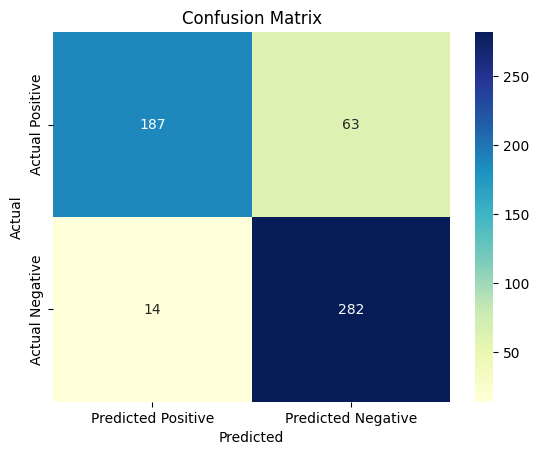

In [ ]:
# Optionally, visualize confusion matrix using Pandas and Seaborn
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

confusion_matrix_df = pd.DataFrame(
    confusion_matrix,
    columns=["Predicted Positive", "Predicted Negative"],
    index=["Actual Positive", "Actual Negative"]
)

print("\nConfusion Matrix (DataFrame):")
print(confusion_matrix_df)

sns.heatmap(confusion_matrix_df, annot=True, fmt="d", cmap="YlGnBu")
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

In [ ]:
spark.stop()

Kode ini menggunakan library XGBoost untuk membangun model klasifikasi biner dengan proses cross-validation untuk menemukan jumlah optimal dari boosting rounds (jumlah pohon). Data dilatih menggunakan format khusus DMatrix, yang dioptimalkan untuk XGBoost. Parameter awal seperti max_depth, learning_rate, dan lainnya ditentukan di xgb_params. Fungsi cv melakukan validasi silang pada data training (dtrain) untuk menemukan jumlah pohon terbaik berdasarkan metrik AUC dengan fitur early stopping. Setelah jumlah pohon terbaik diperoleh (best_n_estimators), model XGBClassifier dilatih dengan parameter ini, digunakan untuk memprediksi data uji (X_test), dan hasilnya dievaluasi menggunakan fungsi evaluate_model. Kode ini menggabungkan tuning parameter dan evaluasi untuk menghasilkan model yang lebih optimal.








---

